<a href="https://colab.research.google.com/github/c4ngo/low-code-book-projects/blob/main/Custom_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf

In [ ]:
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

scikit-learn version: 1.6.1
TensorFlow version: 2.18.0


In [ ]:
file_loc = 'https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv'
df_raw = pd.read_csv(file_loc)

In [ ]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_raw.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df_raw['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [ ]:
mask = (df_raw['TotalCharges']==' ')
df_raw[mask].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [ ]:
mask = (df_raw['tenure']==0)
df_raw[mask][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [ ]:
df_1 = df_raw.replace({'TotalCharges': {' ': 0.0}})
mask = (df_raw['tenure']==0)
df_1[mask][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


In [ ]:
df_2 = df_1.astype({'TotalCharges':'float64'})
df_2.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df_2.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
df_2.value_counts(['PhoneService','MultipleLines'])

PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
Name: count, dtype: int64

In [ ]:
df_2.value_counts(['InternetService','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies'])

InternetService  OnlineSecurity       OnlineBackup         StreamingTV          StreamingMovies    
No               No internet service  No internet service  No internet service  No internet service    1526
Fiber optic      No                   No                   No                   No                      521
                                                           Yes                  Yes                     455
DSL              No                   No                   No                   No                      453
Fiber optic      No                   Yes                  Yes                  Yes                     428
                 Yes                  Yes                  Yes                  Yes                     270
DSL              Yes                  No                   No                   No                      246
                                      Yes                  No                   No                      233
Fiber optic      No                   No                   No                   Yes                     215
                                                           Yes                  No                      212
DSL              Yes                  Yes                  Yes                  Yes                     209
Fiber optic      No                   Yes                  No                   No                      192
DSL              No                   Yes                  No                   No                      181
Fiber optic      Yes                  No                   Yes                  Yes                     157
DSL              No                   No                   Yes                  Yes                     144
                 Yes                  No                   Yes                  Yes                     139
                 No                   Yes                  Yes                  Yes                     138
Fiber optic      No                   Yes                  Yes                  No                      119
                                                           No                   Yes                     115
                 Yes                  No                   No                   No                      107
DSL              Yes                  Yes                  No                   Yes                     100
                 No                   No                   No                   Yes                     100
                                                           Yes                  No                       95
                 Yes                  Yes                  Yes                  No                       95
                                      No                   No                   Yes                      88
Fiber optic      Yes                  Yes                  No                   No                       85
DSL              Yes                  No                   Yes                  No                       70
Fiber optic      Yes                  Yes                  Yes                  No                       67
DSL              No                   Yes                  Yes                  No                       67
Fiber optic      Yes                  Yes                  No                   Yes                      67
DSL              No                   Yes                  No                   Yes                      63
Fiber optic      Yes                  No                   No                   Yes                      44
                                                           Yes                  No                       42
Name: count, dtype: int64

<Axes: xlabel='Contract'>

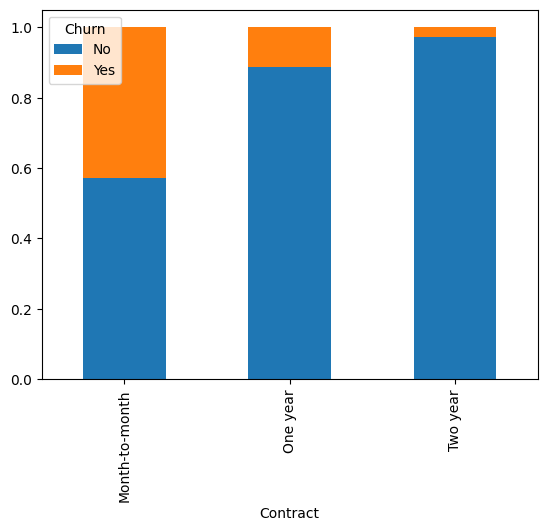

In [ ]:
(df_2.groupby('Contract')['Churn'].value_counts(normalize=True)
.unstack('Churn')
.plot.bar(stacked=True))

In [ ]:
def plot_cat_feature_dist(feature_name):
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)
    .unstack('Churn')
    .plot.bar(stacked=True))

In [ ]:
df_2['AvgMonthlyCharge'] = df_2['TotalCharges']/df_2['tenure']
df_2['DiffCharges'] = df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

,DiffCharges
count,7032.000000
mean,-0.001215
std,2.616165
min,-18.900000
25%,-1.160179
50%,0.000000
75%,1.147775
max,19.125000


In [ ]:
df_2['AvgMonthlyCharge'] = (df_2['TotalCharges'].div(df_2['tenure'])
.replace(np.nan,0))
df_2['DiffCharges'] = df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

,DiffCharges
count,7043.000000
mean,0.063475
std,3.211815
min,-18.900000
25%,-1.159091
50%,0.000000
75%,1.154880
max,80.850000


/tmp/ipython-input-16-4025292760.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)


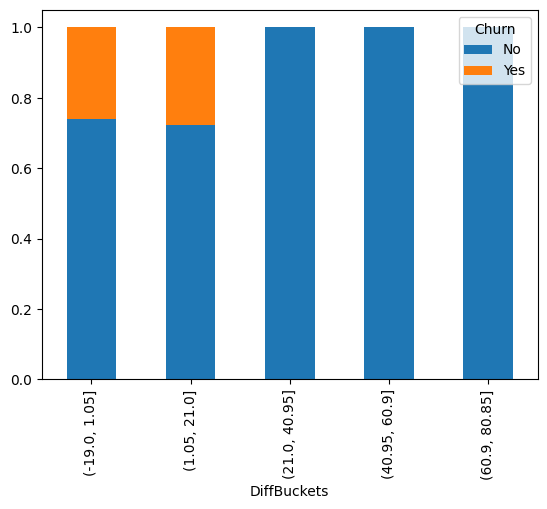

In [ ]:
df_2['DiffBuckets'] = pd.cut(df_2['DiffCharges'], bins=5)
plot_cat_feature_dist('DiffBuckets')

/tmp/ipython-input-16-4025292760.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)


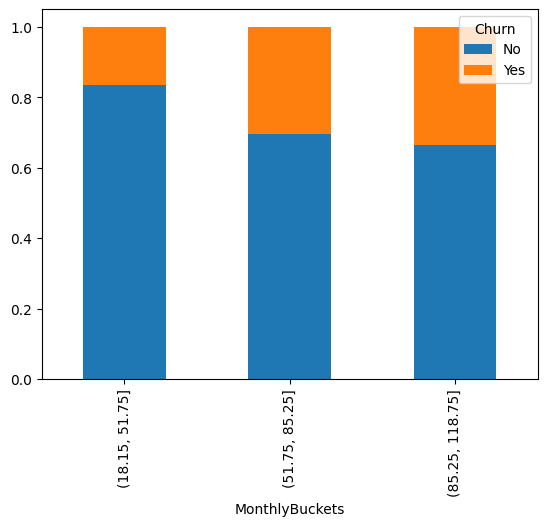

In [ ]:
df_2['MonthlyBuckets'] = pd.cut(df_2['MonthlyCharges'], bins=3)
plot_cat_feature_dist('MonthlyBuckets')

In [ ]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['gender','StreamingTV',
'StreamingMovies','PhoneService'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffCharges', 'DiffBuckets', 'MonthlyBuckets'],
      dtype='object')

In [ ]:
df_3 =df_3.drop(columns=['TotalCharges','AvgMonthlyCharge',
'DiffCharges','MonthlyBuckets'])

In [ ]:
df_3 = df_3.drop(columns=['customerID'])
df_3.dtypes

,0
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


In [ ]:
df_prep = df_3.replace('No internet service', 'No')
df_prep[['OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport']].nunique()

,0
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
'InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection',
'TechSupport','Contract','PaperlessBilling',
'PaymentMethod','DiffBuckets']
X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]
ohe = OneHotEncoder(drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)

In [ ]:
X_cat_trans.toarray()[0]

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0.])

In [ ]:
ohe.inverse_transform(X_cat_trans.toarray())[0]

array(['Yes', 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No',
       'Month-to-month', 'Yes', 'Electronic check',
       Interval(-19.0, 1.05, closed='right')], dtype=object)

In [ ]:
X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
y = df_prep['Churn'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
random_state=113)
X_train.shape

(5634, 28)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
cls = LogisticRegression()
cls.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
cls.score(X_test,
y_test)

0.4804826117814053

In [ ]:
X_test_scaled = scaler.transform(X_test)
cls.score(X_test_scaled, y_test)

0.8005677785663591

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = cls.predict(X_test_scaled)
confusion_matrix(y_test, y_pred, labels=['Yes','No'])

array([[185, 187],
       [ 94, 943]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test, y_pred,
labels=['Yes','No'], pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred,
labels=['Yes','No'], pos_label='Yes'))

Precision: 0.6630824372759857
Recall: 0.49731182795698925


In [ ]:
def custom_predict_routine(example):
  import json
  example = json.loads("""{"customerID": "7090-HPOJU", "gender": "Female",
  "SeniorCitizen": 0, "Partner": "Yes", "Dependents": "Yes", "tenure": 66,
  "PhoneService": "Yes", "MultipleLines": "Yes", "InternetService": "DSL",
  "OnlineSecurity": "Yes", "OnlineBackup": "Yes", "DeviceProtection": "Yes",
  "TechSupport": "No", "StreamingTV": "No", "StreamingMovies": "No",
  "Contract": "Month-to-month", "PaperlessBilling": "Yes",
  "PaymentMethod": "Bank transfer (automatic)", "MonthlyCharges": 67.45,
  "TotalCharges": "4508.65"}""")
  ex_df = pd.DataFrame([example])
  ex_df['TotalCharges'] = ex_df['TotalCharges'].astype('float64')
  ex_df = ex_df.drop(columns=['customerID','gender',
  'StreamingTV','StreamingMovies',
  'PhoneService'])
  ex_df['AvgMonthlyCharge'] = ex_df['TotalCharges']/ex_df['tenure']
  ex_df['DiffCharges'] = ex_df['MonthlyCharges']-ex_df['AvgMonthlyCharge']
  ex_df['DiffBuckets'] = pd.cut(ex_df['DiffCharges'],
  bins=[-18.938,-11.295,-3.69,3.915,11.52,19.125])
  ex_df.pop('DiffCharges')
  numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
  categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
  'InternetService','OnlineSecurity','OnlineBackup',
  'DeviceProtection','TechSupport','Contract',
  'PaperlessBilling','PaymentMethod','DiffBuckets']
  X_num = df_prep[numeric_columns]
  X_cat = df_prep[categorical_columns]
  X_cat_trans = ohe.transform(X_cat)
  X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
  X_scaled = scaler.transform(X)
  cls.predict(X)
  return cls.predict(X)

In [ ]:
import joblib
joblib.dump(cls, 'filename.joblib')
cls = joblib.load('filename.joblib')

In [ ]:
def transform_fn(df):
  df = df.replace({'TotalCharges': {' ': 0.0}})
  df = df.astype({'TotalCharges':'float64'})
  df['AvgMonthlyCharge']= df['TotalCharges'].div(df['tenure'],
  fill_values=0.0)
  df['DiffCharges'] = df['MonthlyCharges']-df['AvgMonthlyCharge']
  df['DiffBuckets'] = pd.cut(df['DiffCharges'], bins=5)
  df = df.drop(columns=['AvgMonthlyCharge', 'gender','StreamingTV',
  'StreamingMovies','PhoneService',
  'customerID', 'DiffCharges'])
  return df

In [ ]:
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
'InternetService','OnlineSecurity',
'OnlineBackup', 'DeviceProtection',
'TechSupport','Contract',
'PaperlessBilling','PaymentMethod',
'DiffBuckets']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
fn_transformer = FunctionTransformer(transform_fn)
col_transformer = ColumnTransformer(
[('ohe', OneHotEncoder(drop='if_binary'), categorical_columns),
('sca', MinMaxScaler(), numeric_columns)])
model = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('preproc', fn_transformer),
('col_trans', col_transformer),
('model', model)])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
le.inverse_transform([1])

array(['Yes'], dtype=object)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
train_dataset=(tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_enc))
.batch(128))
test_dataset=(tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_enc))
.batch(1))

In [ ]:
model = keras.Sequential(
[
keras.layers.Dense(
units=64, input_shape=(28,), activation="relu",
name="input_layer"
),
keras.layers.Dense(units=32, activation="relu",
name="hidden_1"),
keras.layers.Dense(units=16, activation="relu",
name="hidden_2"),
keras.layers.Dense(units=1, activation="sigmoid",
name="output"),
]
)

In [ ]:
loss_fn = keras.losses.BinaryCrossentropy()
metrics = [tf.keras.metrics.BinaryAccuracy(),
tf.keras.metrics.Precision(),
tf.keras.metrics.Recall()]
model.compile(optimizer="adam", loss=loss_fn, metrics=metrics)

In [ ]:
history = model.fit(
x=train_dataset,
epochs=20,
validation_data=test_dataset
)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - binary_accuracy: 0.5471 - loss: 0.6733 - precision: 0.2876 - recall: 0.4654 - val_binary_accuracy: 0.7360 - val_loss: 0.5311 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - binary_accuracy: 0.7389 - loss: 0.5017 - precision: 0.3877 - recall: 0.0492 - val_binary_accuracy: 0.7921 - val_loss: 0.4463 - val_precision: 0.6612 - val_recall: 0.4355
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - binary_accuracy: 0.7965 - loss: 0.4263 - precision: 0.6523 - recall: 0.5103 - val_binary_accuracy: 0.8006 - val_loss: 0.4402 - val_precision: 0.6730 - val_recall: 0.4758
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - binary_accuracy: 0.8053 - loss: 0.4164 - precision: 0.6657 - recall: 0.5407 - val_binary_accuracy: 0.7963 - val_loss: 0.4381 - val_precision: 0.6628 - val_recall: 0.4651
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8092 - loss: 0.4116 - precis

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,
restore_best_weights=True)
history = model.fit(
x=train_dataset,
epochs=100,
validation_data=test_dataset,
callbacks = [early_stopping]
)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - binary_accuracy: 0.8210 - loss: 0.3868 - precision: 0.7008 - recall: 0.5717 - val_binary_accuracy: 0.7878 - val_loss: 0.4388 - val_precision: 0.6388 - val_recall: 0.4516
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8202 - loss: 0.3854 - precision: 0.6985 - recall: 0.5708 - val_binary_accuracy: 0.7871 - val_loss: 0.4391 - val_precision: 0.6343 - val_recall: 0.4570
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8200 - loss: 0.3845 - precision: 0.6977 - recall: 0.5714 - val_binary_accuracy: 0.7850 - val_loss: 0.4397 - val_precision: 0.6273 - val_recall: 0.4570
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8207 - loss: 0.3832 - precision: 0.6981 - recall: 0.5748 - val_binary_accuracy: 0.7821 - val_loss: 0.4404 - val_precision: 0.6182 - val_recall: 0.4570
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8228 - loss: 0.3821 - precisio